<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


## Metrics for Regression


Estimated time needed: **30** minutes


<p style='color: red'>The purpose of this lab is to show you how to evaluate a regression model using various metrics.</p>


## __Table of Contents__

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li><a href="#Datasets">Datasets</a></li>
    <li>
        <a href="#Setup">Setup</a>
        <ol>
            <li><a href="#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="#Importing-Required-Libraries">Importing Required Libraries</a></li>
        </ol>
    </li>
    <li>
        <a href="#Examples">Examples</a>
        <ol>
            <li><a href="#Task-1---Load-the-data-in-a-csv-file-into-a-dataframe">Task 1 - Load the data in a csv file into a dataframe</a></li>
    <li><a href="#Task-2---Identify-the-target-column-and-the-data-columns">Task 2 - Identify the target column and the data columns</a></li>
<li><a href="#Task-3---Split-the-data-set">Task 3 - Split the data set</a></li>
    <li><a href="#Task-4---Build-and-Train-a-Linear-Regression-Model">Task 4 - Build and Train a Linear Regression Model</a></li>
        <li><a href="#Task-5---Evaluate-the-model">Task 5 - Evaluate the model</a></li>    
        </ol>
    </li>
    


<li><a href="#Exercises">Exercises</a></li>
<ol>
    <li><a href="#Exercise-1---Loading-a-dataset-(diamond-dataset)">Exercise 1 - Loading a dataset (diamond dataset)</a></li>
    <li><a href="#Exercise-2---Identify-the-target-column-and-the-data-columns">Exercise 2 - Identify the target column and the data columns</a></li>
    <li><a href="#Exercise-3---Split-the-data">Exercise 3 - Split the data</a></li>
    <li><a href="#Exercise-4---Predict-values">Exercise 4 - Predict values</a></li>
    <li><a href="#Exercise-5---Evaluate-the-model">Exercise 5 - Evaluate the model</a></li>
    </ol>
</ol>




## Objectives

After completing this lab you will be able to:

 - Use Pandas to load data sets.
 - Identify the target and features.
 - Split the dataset into training and testing sets.
 - Use Linear Regression to build a prediction model.
 - Use metrics to evaluate the model.


## Datasets

In this lab you will be using dataset(s):

 - Modified version of car mileage dataset. Original dataset available at https://archive.ics.uci.edu/ml/datasets/auto+mpg 
 - Modified version of diamonds dataset. Original dataset available at https://www.openml.org/search?type=data&sort=runs&id=42225&status=active
 


----


## Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.


### Installing Required Libraries

The following required libraries are pre-installed in the Skills Network Labs environment. However, if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda), you will need to install these libraries by removing the `#` sign before `!pip` in the code cell below.


In [1]:
!pip install pandas==1.3.5
!pip install scikit-learn==0.20.1
!pip install numpy==1.21.6

In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [4]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

## Task 1 - Load the data in a csv file into a dataframe


In [6]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-BD0231EN-SkillsNetwork/datasets/mpg.csv")
df.head(5)

,MPG,Cylinders,Engine Disp,Horsepower,Weight,Accelerate,Year,Origin
0,15.0,8,390.0,190,3850,8.5,70,American
1,21.0,6,199.0,90,2648,15.0,70,American
2,18.0,6,199.0,97,2774,15.5,70,American
3,16.0,8,304.0,150,3433,12.0,70,American
4,14.0,8,455.0,225,3086,10.0,70,American


Let's look at some sample rows from the dataset we loaded:


In [7]:
# show 5 random rows from the dataset
df.sample(5)

,MPG,Cylinders,Engine Disp,Horsepower,Weight,Accelerate,Year,Origin
97,15.0,8,318.0,150,3777,12.5,73,American
26,26.0,4,97.0,46,1835,20.5,70,European
319,41.5,4,98.0,76,2144,14.7,80,European
132,14.0,8,318.0,150,4457,13.5,74,American
188,24.5,4,98.0,60,2164,22.1,76,American


Let's find out the number of rows and columns in the dataset:


In [8]:
df.shape

(392, 8)

Let's create a scatter plot of Weight versus mileage(MPG) . This will help us visualize the relationship between them.


<AxesSubplot:xlabel='Weight', ylabel='MPG'>

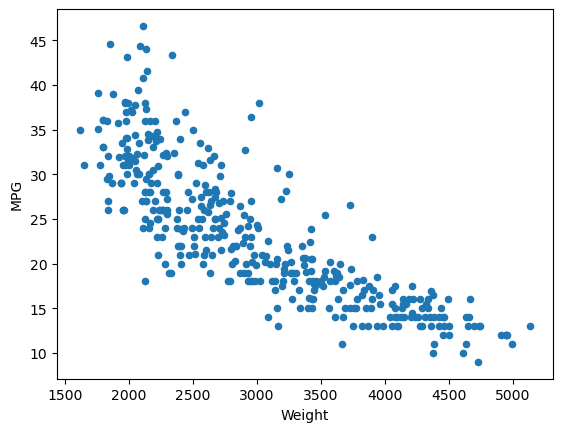

In [9]:
df.plot.scatter(x="Weight", y="MPG")

You are encouraged to create more plots to visualize relationships amongst other columns


<AxesSubplot:xlabel='Horsepower', ylabel='MPG'>

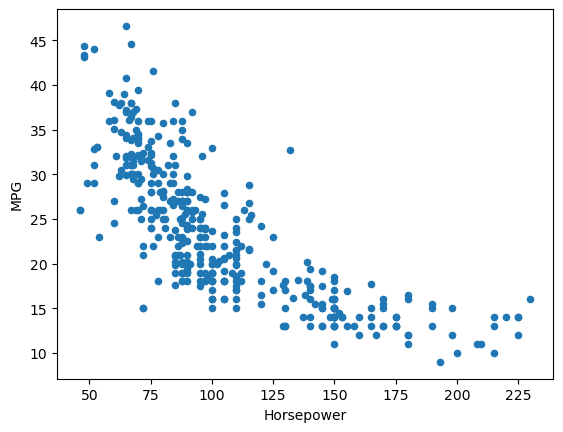

In [10]:
df.plot.scatter(x="Horsepower", y="MPG")

## Task 2 - Identify the target column and the data columns


First we identify the target. Target is the value that our machine learning model needs to predict


In [11]:
y = df["MPG"] # y is the target

We identify the features next. Features are the values our machine learning model learns from


In [12]:
X = df[["Horsepower","Weight"]] # X is the set of features

## Task 3 - Split the data set


We split the data set in the ratio of 70:30. 70% training data, 30% testing data.


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

The random_state variable controls the shuffling applied to the data before applying the split. Pass the same integer for reproducible output across multiple function calls


## Task 4 - Build and Train a Linear Regression Model


Create a LR model


In [14]:
lr = LinearRegression()

Train/Fit the model using the training data set


In [15]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Task 5 - Evaluate the model


Your model is now trained. We use the testing data to evaluate the model.


In [16]:
lr.score(X_test,y_test)

0.7691968626070727

To compute the detailed metrics we need two values, the original mileage and the predicted mileage.


In [17]:
original_values = y_test
predicted_values = lr.predict(X_test)

##### R Squared


In [19]:
r2_score(original_values, predicted_values) # Higher the value the better the model

0.7691968626070727

##### Mean Squared Error


In [20]:
mean_squared_error(original_values, predicted_values) # Lower the value the better the model

12.212748938323992

##### Root Mean Squared Error


In [21]:
sqrt(mean_squared_error(original_values, predicted_values)) # Lower the value the better the model

3.4946743679953918

##### Mean Absolute Error


In [23]:
mean_absolute_error(original_values, predicted_values) # Lower the value the better the model

2.853067881509254

# Exercises


### Exercise 1 - Loading a dataset (diamond dataset)


In [24]:
df2 = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-BD0231EN-SkillsNetwork/datasets/diamonds.csv")
df2.head(5)

,s,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Exercise 2 - Identify the target column and the data columns


 - Use the price column as target
 - Use the columns carat, depth and table as features


In [25]:
y = df2["price"]
X = df2[["carat", "depth", "table"]]

### Exercise 3 - Split the data


Split the dataset into training and testing sets. Make 25% of the data as testing set. Use 42 as random state.


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

### Exercis 4

In [27]:
lr2 = LinearRegression()
lr2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
lr2.score(X_train, y_train)

0.85390641012473

Predict the values using the test data.


In [31]:
original_values = y_test
predicted_values = lr2.predict(X_test)

### Exercise 5 - Evaluate the model


Print the metrics :
- R squared
- mean absolute error
- mean squared error
- root mean squared error


In [33]:
# R squared
r2_score(original_values, predicted_values) # Higher the value the better the model

0.8529493985221452

In [36]:
# Mean Absolute Error
mean_absolute_error(original_values, predicted_values) # Lower the value the better the model

991.8625215830598

In [37]:
# Mean Squared Error
mean_squared_error(original_values, predicted_values) # Lower the value the better the model

2310119.6354749133

In [38]:
# Roote Mean Squared Error
sqrt(mean_squared_error(original_values, predicted_values)) # Lower the value the better the model

1519.9077720292482

Congratulations you have completed this lab.<br>


## Authors


[Ramesh Sannareddy](https://www.linkedin.com/in/rsannareddy/)


### Other Contributors


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-04-15|0.1|Ramesh Sannareddy|Initial Version Created|


Copyright © 2023 IBM Corporation. All rights reserved.
